In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [4]:
# Load the model
model = joblib.load("model_pipeline/model.pkl")

# Load and preprocess the training data
from model_pipeline.preprocess import load_data, preprocess, split_data

df = load_data("data/train.csv")
df = preprocess(df)
X_train, X_test, y_train, y_test = split_data(df)

print("✅ Data loaded and model ready")

📂 Loading data from: data/train.csv
🔍 Preprocessing data...
✅ Data loaded and model ready


/Users/juanpabloperez-cerda/Documents/food-delivery-delay-prediction-jppc/model_pipeline/preprocess.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weather'] = df['Weather'].astype('category').cat.codes
/Users/juanpabloperez-cerda/Documents/food-delivery-delay-prediction-jppc/model_pipeline/preprocess.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Traffic_Level'] = df['Traffic_Level'].astype('category').cat.codes
/Users/juanpabloperez-cerda/Documents/food-delivery-delay-prediction-jppc/mo

In [5]:
# Get feature importances
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

importance_df

,feature,importance
1,Distance_km,0.683048
6,Preparation_Time_min,0.137682
0,Order_ID,0.068628
3,Traffic_Level,0.030935
7,Courier_Experience_yrs,0.029522
2,Weather,0.026105
4,Time_of_Day,0.014577
5,Vehicle_Type,0.009503


/var/folders/jy/412vfggj0h966mwx95f9jyjw0000gn/T/ipykernel_91930/3337195839.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


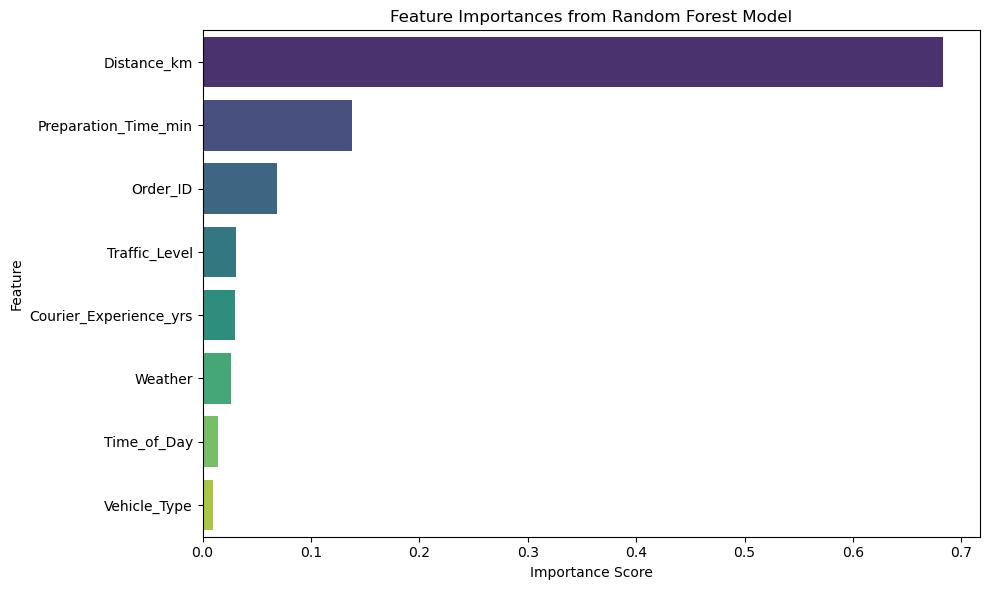

In [6]:
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance_df,
    x="importance",
    y="feature",
    palette="viridis"
)
plt.title("Feature Importances from Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [7]:
X_test["actual"] = y_test
X_test["predicted"] = model.predict(X_test.drop(columns=["actual"]))
X_test["error"] = X_test["predicted"] - X_test["actual"]

X_test.sort_values("error", key=abs, ascending=False).head(5)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,actual,predicted,error
877,813,2.93,0,2,2,0,24,8.0,94,38.74,-55.26
28,903,4.04,3,1,3,0,11,9.0,70,33.44,-36.56
293,465,19.26,4,2,2,2,21,6.0,67,97.49,30.49
471,93,15.34,2,1,0,0,18,6.0,54,79.29,25.29
866,499,19.50,0,0,2,0,18,2.0,73,96.40,23.40
